\begin{exercise}
8.1. 
\end{exercise}


In [1]:
library(mlbench)
set.seed(200)
df <- mlbench.friedman1(200,sd=1)
df <- data.frame(cbind(df$x,df$y))
colnames(df)[ncol(df)] <- "y"
head(df)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0.5337724,0.6478064,0.85078526,0.18159957,0.92903976,0.36179060,0.8266609,0.4214081,0.59111440,0.5886216,18.46398
0.5837650,0.4381528,0.67272659,0.66924914,0.16379784,0.45305931,0.6489601,0.8446239,0.92819306,0.7584008,16.09836
0.5895783,0.5879065,0.40967108,0.33812728,0.89409334,0.02681911,0.1785614,0.3495908,0.01759542,0.4441185,17.76165
0.6910399,0.2259548,0.03335447,0.06691274,0.63744519,0.52500637,0.5133614,0.7970260,0.68986918,0.4450716,13.78730
0.6673315,0.8188985,0.71676079,0.80324287,0.08306864,0.22344157,0.6644906,0.9038919,0.39696995,0.5500808,18.42984
0.8392937,0.3862983,0.64618857,0.86105431,0.63038947,0.43703891,0.3360117,0.6489177,0.53116033,0.9066182,20.85817


In [2]:
library(e1071)
skew_info <- apply(df,2,skewness)
sort(skew_info,decreasing = T)

X4            X7            X6            X9             y 
 0.1321730061  0.1171995975  0.0446236439  0.0275459493 -0.0003679215 
           X1            X8            X2            X5            X3 
-0.0146223766 -0.0305118975 -0.0364974029 -0.0700650801 -0.0945172159 
          X10 
-0.1025775567

Loading required package: ggplot2


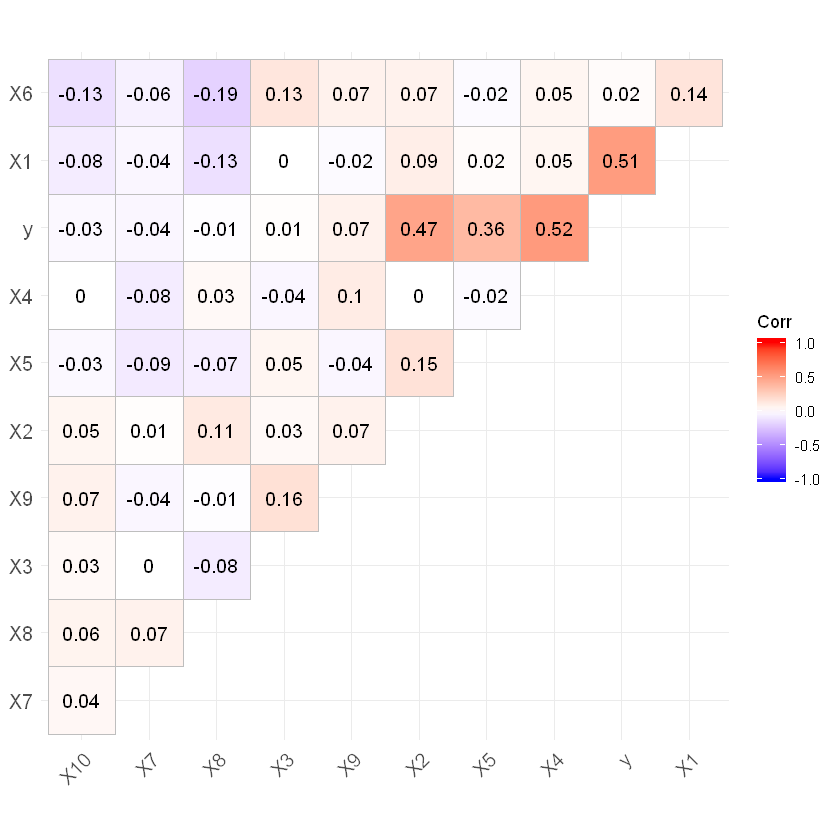

In [3]:
#cor
library(ggcorrplot)
ggcorrplot(round(cor(df),2), hc.order = TRUE, type = "upper", lab = TRUE)

In [2]:
library(randomForest)
library(caret)
fit_rf1 <- randomForest(y~.,data=df,importance=T,ntree=1000)
# varImpPlot(fit_rf)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



\begin{remark}
must be careful with output of varImp before using cbind,
the order might be different
\end{remark}

In [4]:
#b. add highly correlated perdictors
set.seed(100)
df$HighCor <- df$X1 + rnorm(200)*.1
cor(df$X1,df$HighCor)

[1] 0.9509187

In [5]:
fit_rf2 <- randomForest(y~.,data=df,importance=T,ntree=1000)
# apply(cbind(feat_imp,varImp(fit_rf2,scale = F)),2,round)

In [6]:
feat_imp <- varImp(fit_rf1,scale=F)
feat_imp <- rbind(feat_imp,NaN)
rownames(feat_imp)[11] <- c("HighCor")
feat_imp <- cbind(feat_imp,varImp(fit_rf2,scale = F))
feat_imp$features <- rownames(feat_imp)

In [9]:
names(feat_imp) <- c("original","high_cor","features")
library(reshape2)
mlt <- melt(feat_imp,id.vars = "features")

In [14]:
mlt

features,variable,value
X1,original,8.732235404
X2,original,6.415369387
X3,original,0.763591825
X4,original,7.615118809
X5,original,2.023524577
X6,original,0.165111172
X7,original,-0.005961659
X8,original,-0.166362581
X9,original,-0.095292651
X10,original,-0.074944788


Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

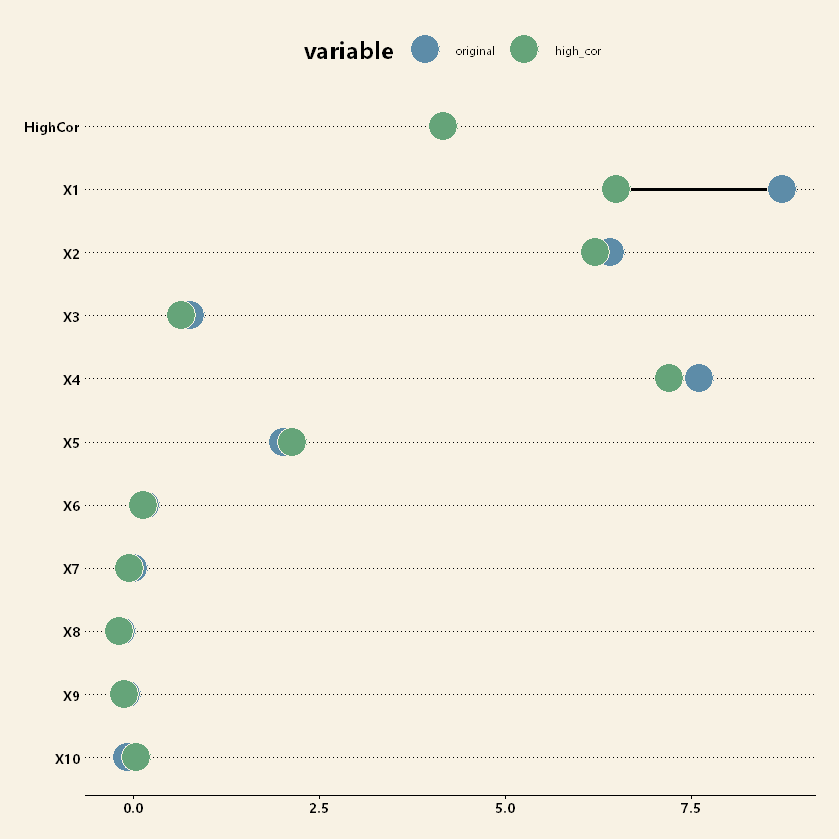

In [18]:
library(scales)
library(ggplot2)
library(ggthemes)
windowsFonts(YaHei=windowsFont("微软雅黑") )
cbPalette  <- c("#5d8ca8","#65a479")
mlt$features <- factor(mlt$features,c('X10','X9','X8','X7','X6','X5','X4','X3', 'X2', 'X1','HighCor'))
ggplot(mlt, aes(value,features,fill=variable)) + geom_line(aes(group = features),size=1) + 
    geom_point(shape=21,size=8,colour="#F8F2E4") + 
#     geom_point(aes(size=总工时费,colour="#F8F2E4"))+
    scale_x_continuous(label = comma)+
    scale_fill_manual(values=cbPalette)+
    theme_wsj(title_family = "YaHei",base_family ="YaHei",base_size =8) +  
    theme(legend.title = element_text(size=14, face = "bold")) 

\begin{remark}
(b.)
\end{remark}


In [89]:
#rf based on conditional inference trees
library(party)
set.seed(147)
fit_rf3 <- cforest(y~.,data=df[,1:11],controls=cforest_control(ntree=1000))
set.seed(147)
fit_rf4 <- cforest(y~.,data=df,controls=cforest_control(ntree=1000))

In [114]:
feat_imp <- cbind(
    round(data.frame(varimp(fit_rf3)),2),
    round(data.frame(varimp(fit_rf3,conditional = T)),2)
    )

feat_imp <- rbind(feat_imp,NaN)
rownames(feat_imp)[11] <- c("HighCor")

feat_imp <- cbind(
    feat_imp,
    round(data.frame(varimp(fit_rf4)),2),
    round(data.frame(varimp(fit_rf4,conditional = T)),2)
    )

colnames(feat_imp) <- c("Original","COR","ConInf","ConInf_Cor")
feat_imp

,Original,COR,ConInf,ConInf_Cor
X1,9.01,2.97,6.43,1.32
X2,6.80,3.97,6.41,3.73
X3,0.05,0.03,0.04,0.01
X4,8.81,4.91,8.07,4.63
X5,2.17,0.72,2.19,0.81
X6,0.00,0.02,0.03,0.01
X7,0.11,0.02,0.11,0.01
X8,-0.07,-0.01,-0.07,-0.01
X9,-0.03,-0.01,-0.03,0.00
X10,-0.02,0.01,-0.04,-0.01


In [122]:
feat_imp$feat <- factor(rownames(feat_imp),levels=rownames(feat_imp))
feat_imp<- feat_imp[,c(5,1:4)]
rownames(feat_imp) <- NULL
library(reshape2)
mlt <- melt(feat_imp)

Using feat as id variables


Warning message:
"Removed 2 rows containing missing values (geom_point)."

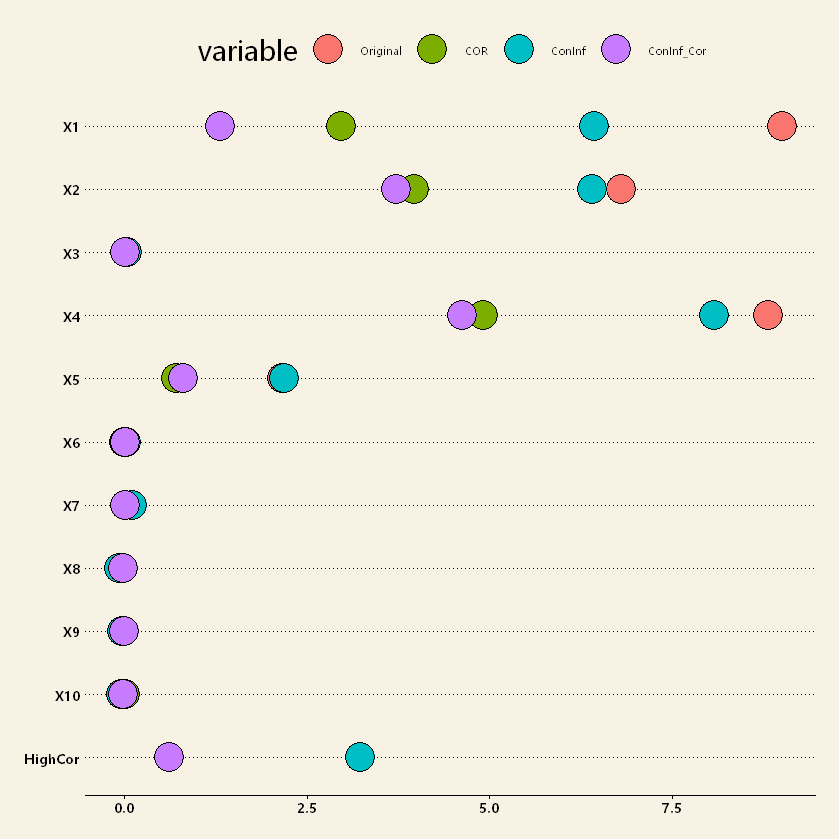

In [133]:
mlt$feat <- factor(mlt$feat,c('HighCor','X10','X9','X8','X7','X6','X5','X4','X3', 'X2', 'X1'))
ggplot(mlt, aes(value,feat,fill = variable)) +
    geom_point(shape=21,size=8) + 
    theme_wsj(title_family = "YaHei",base_family ="YaHei",base_size =8) 

- (d)

In [184]:
colnames(df)

[1] "X1"      "X2"      "X3"      "X4"      "X5"      "X6"      "X7"     
 [8] "X8"      "X9"      "X10"     "HighCor" "y"

In [181]:
library(ipred)
set.seed(147)
fit_bag1 <- bagging(y~.,data=df[,names(df)!="HighCor"],nbag=50)
set.seed(147)
fit_bag2 <- bagging(y~.,data=df,nbag=50)

In [188]:
col_name <- c('X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','HighCor')
imp_bag1 <- varImp(fit_bag1)
names(imp_bag1) <- "original"
imp_bag1$feat <- factor(rownames(imp_bag1),levels = col_name)

imp_bag2 <- varImp(fit_bag2)
names(imp_bag2) <- "original"
imp_bag2$feat <- factor(rownames(imp_bag2),levels = col_name)

In [193]:
merge(imp_bag1,imp_bag2,by = 'feat',all.y = TRUE)

feat,original.x,original.y
X1,1.9241504,1.8221721
X2,2.3043817,2.2644641
X3,1.3663712,1.1905058
X4,2.7656282,2.6933430
X5,2.4252363,2.3287829
X6,1.0027788,0.8736762
X7,0.9364069,0.8761946
X8,0.5814529,0.4716510
X9,0.6762370,0.5921200
X10,0.8571977,0.7840515


In [196]:
library(Cubist)
set.seed(147)
fit_cubist1 <- cubist(x=df[,1:10],y=df$y,committees=100)
set.seed(147)
fit_cubist2 <- cubist(x=df[,names(df)!="y"],y=df$y,committees=100)

In [197]:
imp_cubist1 <- varImp(fit_cubist1)
names(imp_cubist1) <- "original"
imp_cubist1$feat <- factor(rownames(imp_cubist1),levels = col_name)

imp_cubist2 <- varImp(fit_cubist2)
names(imp_cubist2) <- "original"
imp_cubist2$feat <- factor(rownames(imp_cubist2),levels = col_name)

In [198]:
merge(imp_cubist1,imp_cubist2,by = 'feat',all.y = TRUE)

feat,original.x,original.y
X1,71.5,69.0
X2,58.5,62.0
X3,47.0,44.0
X4,48.0,47.0
X5,33.0,27.5
X6,13.0,11.0
X7,0.0,0.0
X8,0.0,3.5
X9,0.0,0.0
X10,0.0,0.0


\begin{exercise}
2.Use a simulation to show tree bias with different granularities.
\end{exercise}

[some ref](http://www.docin.com/p-1057249915.html)

> Recall found that predictors that are more granular (or have more potential split points) have a greater chance of being used towards the top of a tree to partition, even if the redictor has little-to-no relationship with the response.

In [1]:
set.seed(102)
X1 <- rep(1:2,each=100)
Y <- X1 + rnorm(200,mean=0,sd=4)
set.seed(103)
X2 <- rnorm(200,mean=0,sd=2)

df<- data.frame(Y=Y,X1=X1,X2=X2)
head(df)

Y,X1,X2
1.722092,1,-1.5719464
4.138936,1,0.1094778
-4.412658,1,-2.3451207
8.933193,1,-0.3346256
5.953887,1,-3.7300632
5.802470,1,-0.2408805


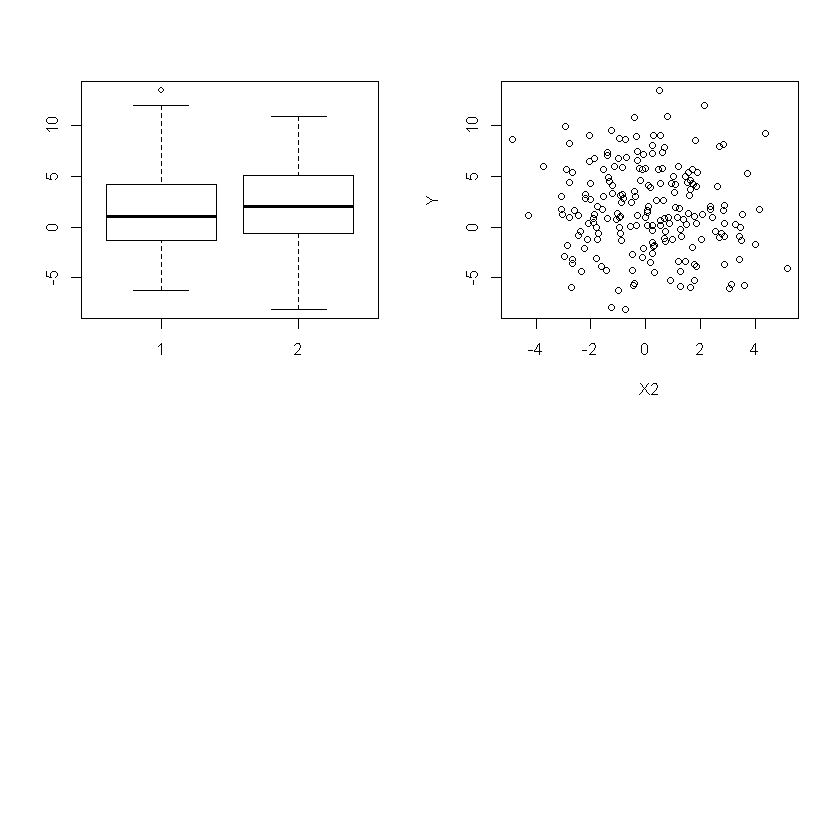

In [16]:
par(mfrow=c(2,2)) 
boxplot(Y ~ X1, data = df)
plot(X2,Y)

\begin{exercise}

\end{exercise}
> Figure 2 provides the variable importance plots for boosting using two extreme values for the bagging fraction (0.1 and 0.9) and the learning rate (0.1 and 0.9) for the solubility data. The left-hand plot has both parameters set to 0.1, and the right-hand plot has both set to 0.9. 
- (a) Why does the model on the right focus its importance on just the first few of predictors, whereas the model on the left spreads importance across more predictors?
- (b) Which model do you think would be more predictive of other samples?
- (c) How would increasing interaction depth affect the slope of predictor importance for either model in Figure 2?

\begin{exercise}

\end{exercise}


In [21]:
library(AppliedPredictiveModeling)
data(solubility)

In [22]:
trn <- subset(solTrainXtrans,select = "MolWeight")
vld <- subset(solTestXtrans,select = "MolWeight")

In [23]:
library(caret)
set.seed(100)
fit_tree <- train(trn,solTrainY,method = "rpart2",tuneLength=1,metric="Rsquared")
vld_tree <- data.frame(method="rpart",obs=solTestY,
                       pred=predict(fit_tree,vld))

In [24]:
set.seed(100)
fit_rf <- train(trn,solTrainY,method = "rf",tuneLength = 1,metric="Rsquared")
vld_rf <- data.frame(method="rf",obs=solTestY,
                    pred=predict(fit_rf,vld))

In [45]:
set.seed(100)
fit_cubist_1 <- train(trn,solTrainY,method = "cubist",
                     verbose=F,metric="Rsquared",
                      tuneGrid=expand.grid(committees=1,neighbors=0))
vld_cubist_1 <- data.frame(method="1CMTE_without",obs=solTestY,
                    pred=predict(fit_cubist_1,vld))

fit_cubist_2 <- train(trn,solTrainY,method = "cubist",
                     verbose=F,metric="Rsquared",
                      tuneGrid=expand.grid(committees=1,neighbors=c(1,3,5,7)))
vld_cubist_2 <- data.frame(method="1CMTE_with",obs=solTestY,
                    pred=predict(fit_cubist_2,vld))

fit_cubist_3 <- train(trn,solTrainY,method = "cubist",
                     verbose=F,metric="Rsquared",
                      tuneGrid=expand.grid(committees=100,neighbors=0))
vld_cubist_3 <- data.frame(method="100CMTE_without",obs=solTestY,
                    pred=predict(fit_cubist_3,vld))

fit_cubist_4 <- train(trn,solTrainY,method = "cubist",
                     verbose=F,metric="Rsquared",
                      tuneGrid=expand.grid(committees=100,neighbors=c(1,3,5,7)))
vld_cubist_4 <- data.frame(method="100CMTE_with",obs=solTestY,
                    pred=predict(fit_cubist_4,vld))

In [40]:
cat("vld_tree",defaultSummary(vld_tree)['Rsquared'],'\n')
cat("vld_rf",defaultSummary(vld_rf)['Rsquared'],'\n')
cat("vld_cubist_1",defaultSummary(vld_cubist_1)['Rsquared'],'\n')
cat("vld_cubist_2",defaultSummary(vld_cubist_2)['Rsquared'],'\n')
cat("vld_cubist_3",defaultSummary(vld_cubist_3)['Rsquared'],'\n')
cat("vld_cubist_4",defaultSummary(vld_cubist_4)['Rsquared'],'\n')

vld_tree 0.3219683 
vld_rf 0.5878748 
vld_cubist_1 0.486236 
vld_cubist_2 0.4235102 
vld_cubist_3 0.4881868 
vld_cubist_4 0.4223147 


&#x1F31F; CART outperforms the worst with regard to R2

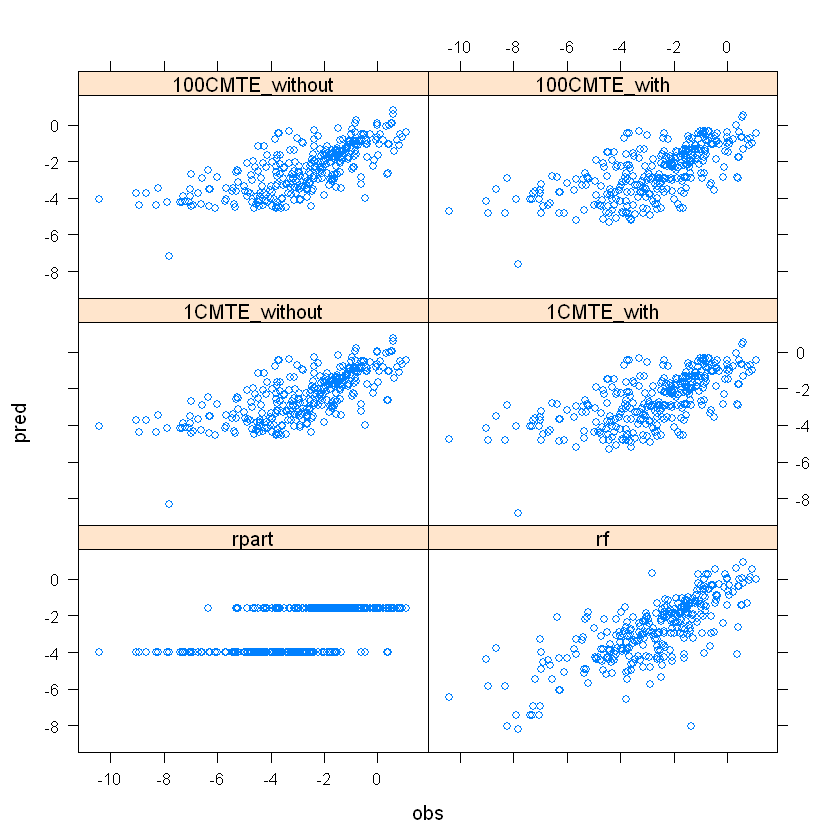

In [47]:
# mdls <- rbind(vld_tree,vld_rf,vld_cubist_1,vld_cubist_2,vld_cubist_3,vld_cubist_4)
library(lattice)
xyplot(pred~obs|method,data=mdls,layout = c(2,3))

\begin{exercise}

\end{exercise}


In [1]:
library(caret)
data(tecator)

set.seed(1029)
trn_id <- createDataPartition(endpoints[,3],p=3/4,list=F)
trnX <- data.frame(absorp[trn_id,])
vldX <- data.frame(absorp[-trn_id,])

trnY <- endpoints[trn_id,3]
vldY <- endpoints[-trn_id,3]

Loading required package: lattice
Loading required package: ggplot2


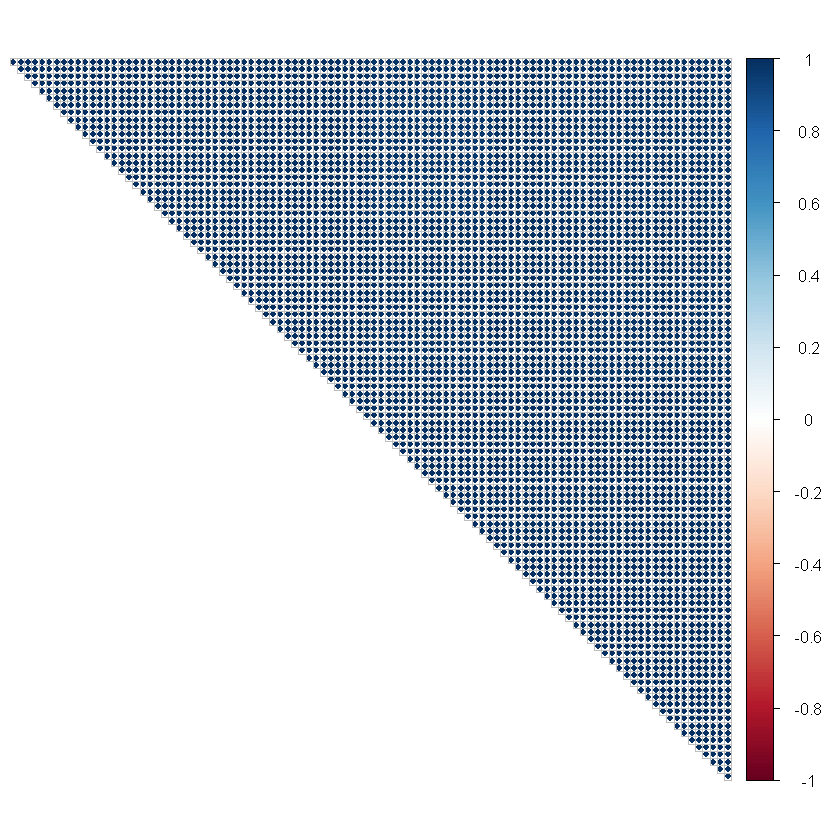

In [55]:
library(corrplot)
corrplot(cor(trnX),type="upper",order="hclust",tl.pos="n")

In [2]:
# ctrl <- trainControl(method = "repeatedcv",repeats = 5)
ctrl <- trainControl(method="cv",number=5)
#cart
set.seed(529)
fit_cart <- train(trnX,trnY,method = "rpart",trControl=ctrl,tuneLength=25)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

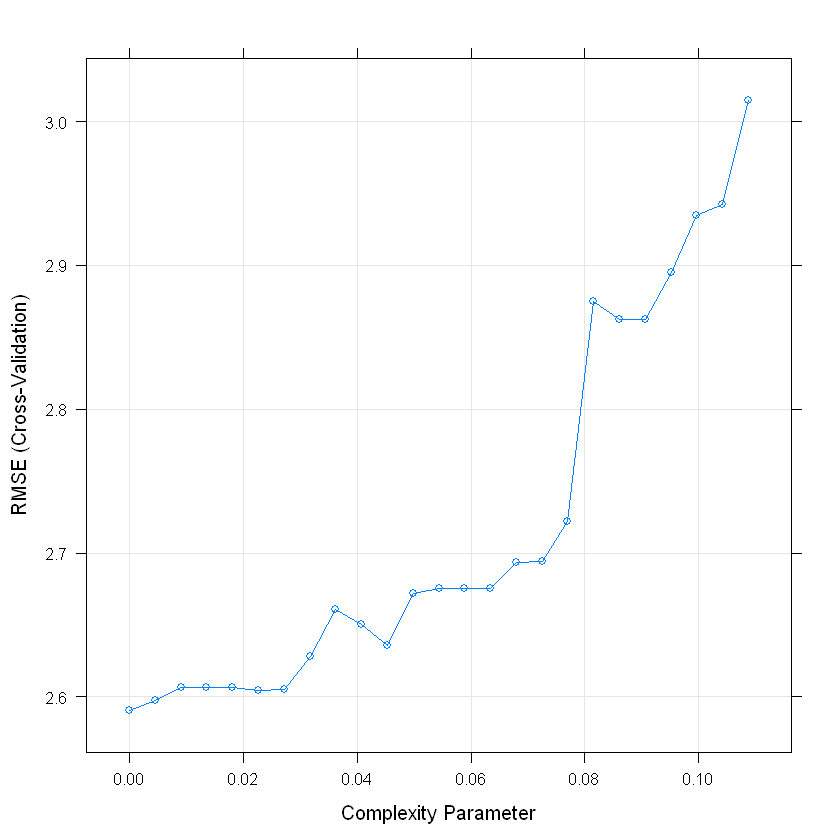

In [3]:
plot(fit_cart)

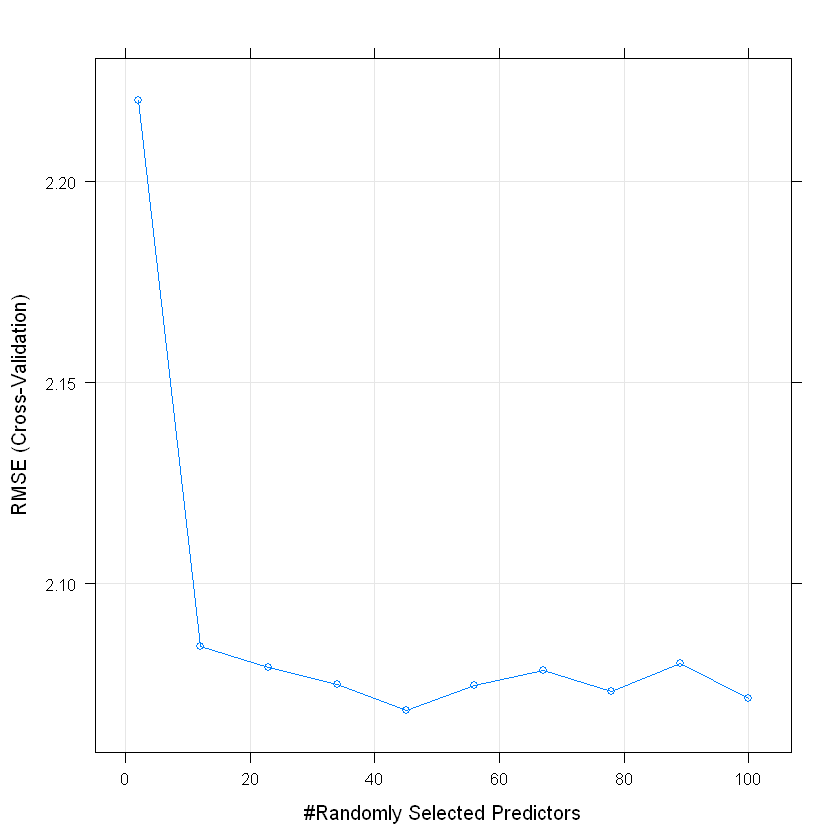

In [4]:
set.seed(529)
fit_rf <- train(trnX,trnY,method = "rf",ntree=1500,
               tuneLength=10,trControl=ctrl)
plot(fit_rf)

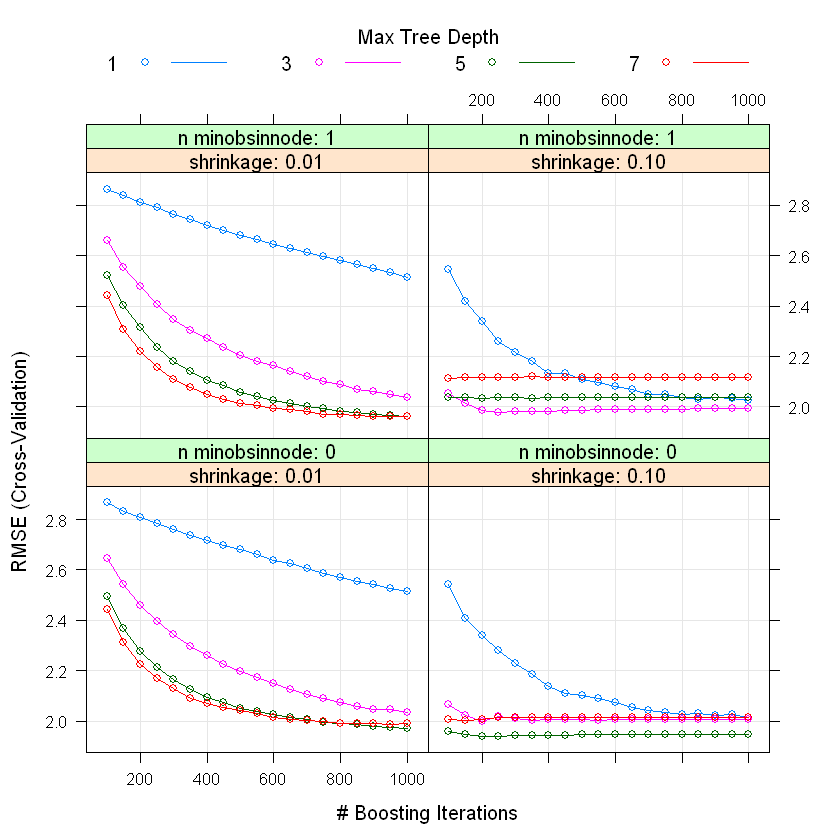

In [7]:
grid_gbm <- expand.grid(interaction.depth=seq(1,7,by=2),
                    n.trees=seq(100,1000,by=50),
                       shrinkage=c(0.01,0.1),
                       n.minobsinnode=c(0,1))
set.seed(529)
fit_gbm <- train(trnX,trnY,method="gbm",verbose=F,
                tuneGrid=grid_gbm,trControl=ctrl)
plot(fit_gbm)

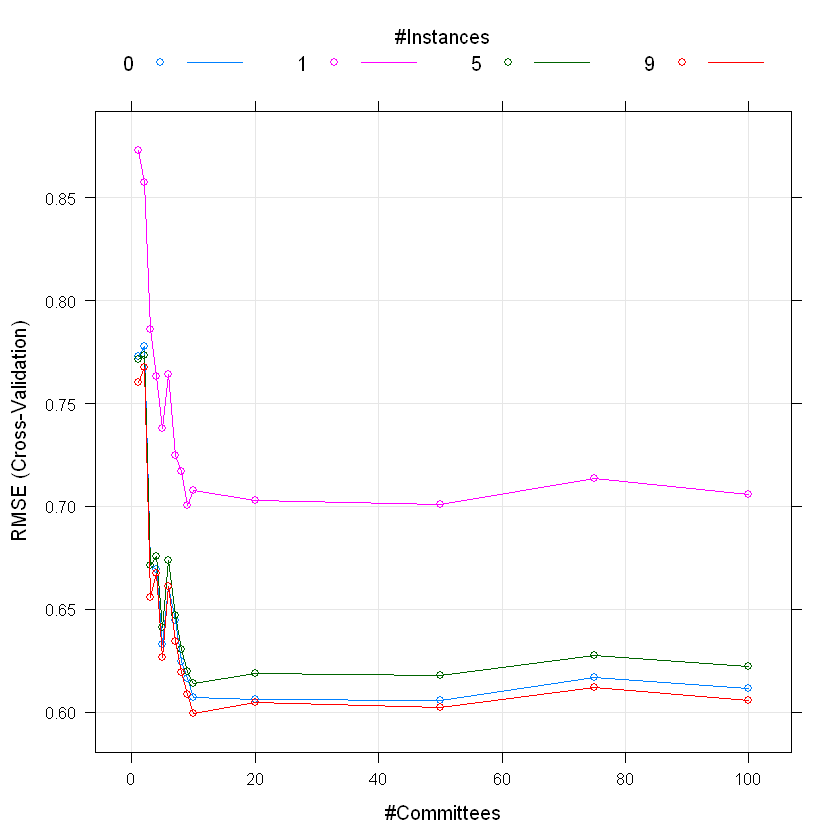

In [8]:
grid_cubist <- expand.grid(committees=c(1:10,20,50,75,100),
                       neighbors=c(0,1,5,9))
set.seed(529)
fit_cubist <- train(trnX,trnY,method="cubist",verbose=F,
                   tuneGrid=grid_cubist,trControl=ctrl)
plot(fit_cubist)

\begin{exercise}

\end{exercise}


In [16]:
library(AppliedPredictiveModeling)
data(permeability)

In [17]:
fingerprints_flt <- fingerprints[,-nearZeroVar(fingerprints)]
set.seed(614)
trn_id <- createDataPartition(permeability,p = 0.75,list=F)
trn <- fingerprints_flt[trn_id,]
vld <- fingerprints_flt[-trn_id,]

trnY <- permeability[trn_id]
vldY <- permeability[-trn_id]

In [18]:
set.seed(614)
ctrl <- trainControl(method = "LGOCV")

[1] 125 388

In [19]:
set.seed(614)
grid_cart <- expand.grid(maxdepth=seq(1,10,by=1))
fit_cart <- train(trn,log10(trnY),method = "rpart2",
                 tuneGrid=grid_cart,trControl=ctrl)

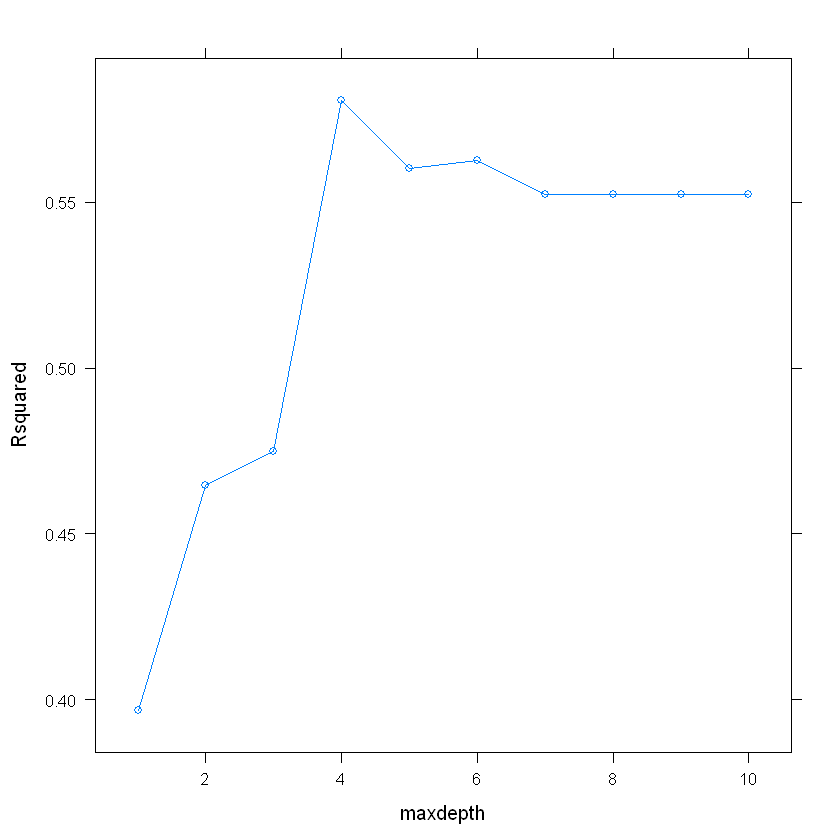

In [36]:
xyplot(Rsquared~maxdepth,data=fit_cart$results,type=c("o"))

In [21]:
set.seed(614)
fit_rf <- train(trn,log10(trnY),method = "rf",tuneLength=10,
               importance=T,trControl=ctrl)

> Random forests’ tuning parameter is the number of randomly selected predictors, k, to choose from at each split, and is commonly referred to as mtry. 

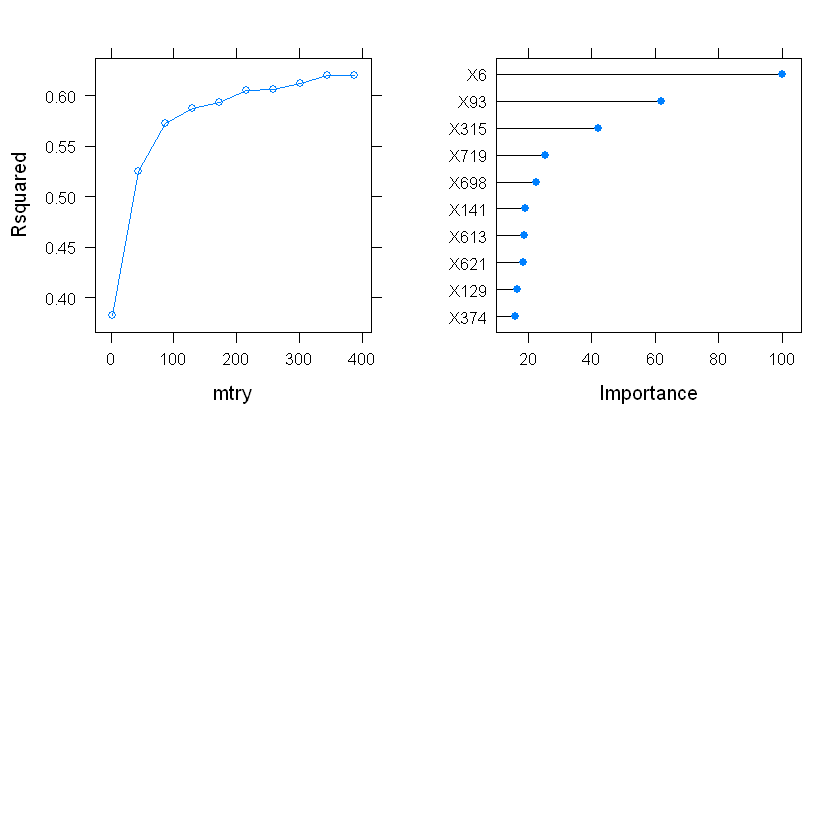

In [56]:
p1 <- xyplot(Rsquared~mtry,data=fit_rf$results,type=c("o"))
p2 <- plot(varImp(fit_rf),top=10)
library(gridExtra)
grid.arrange(p1,p2,ncol=2,nrow=2)

In [41]:
set.seed(614)
grid_gbm <- expand.grid(
    interaction.depth=seq(1,7,by=2),
    n.trees=seq(100,1000,by=50),
    shrinkage=c(0.01,0.1),
    n.minobsinnode=c(10,20))

fit_gbm <- train(trn,log10(trnY),method = "gbm",metric="Rsquared",
                verbose=F,tuneGrid=grid_gbm,trControl=ctrl)

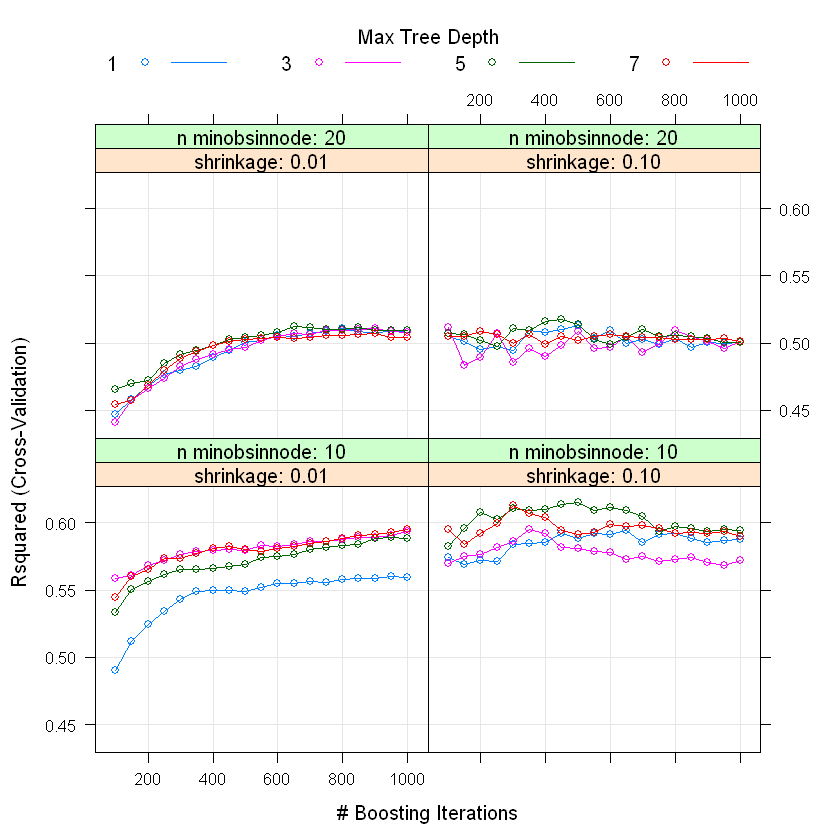

In [42]:
plot(fit_gbm)

\begin{exercise}

\end{exercise}

In [11]:
library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)

cmp <- subset(ChemicalManufacturingProcess,select = -Yield)
yield <- subset(ChemicalManufacturingProcess,select = Yield)

In [80]:
library(caret)
set.seed(517)
trn_id <- createDataPartition(yield$Yield,p=0.7,list=F)

trnX <- cmp[trn_id,]
vldX <- cmp[-trn_id,]

trnY <- yield[trn_id,]
vldY <- yield[-trn_id,]

In [14]:
any(is.na(cmp))
any(is.na(yield))

[1] TRUE

[1] FALSE

In [81]:
#why can I preprocess before I split the data?
# why using model based on trn set to process test set?

# 1. handling missing values
fit_proc <- preProcess(trnX,method = c("BoxCox","center","scale","knnImpute"))
trnX <- predict(fit_proc,newdata = trnX)
vldX <- predict(fit_proc,newdata=vldX)

#2. removing nzv predictors 
nzv_id <- nearZeroVar(trnX)
trnX <- trnX[,-nzv_id]
vldX <- vldX[,-nzv_id]

#3. removing high correlation 
cor_id <- findCorrelation(cor(trnX))
trnX <- trnX[,-cor_id]
vldX <- vldX[,-cor_id]

set.seed(517)
ctrl <- trainControl(method = "boot",number=25)

In [22]:
#CART
set.seed(614)
grid_cart <- expand.grid(maxdepth=seq(1,10,by=1))
fit_cart <- train(trnX,trnY,method = "rpart2",metric = "Rsquared",
                 tuneGrid=grid_cart,trControl=ctrl)

In [24]:
#RF
set.seed(614)
grid_rf <- expand.grid(mtry=seq(2,38,by=3))
fit_rf <- train(trnX,trnY,method = "rf",metric = "Rsquared",
                 tuneGrid=grid_rf,trControl=ctrl,importance=T)

In [26]:
#GBM
set.seed(614)
grid_gbm <- expand.grid(
    interaction.depth=seq(1,6,by=1),
    n.trees=c(25,50,100,200),
    shrinkage=c(0.01,0.5,0.1,0.2),
    n.minobsinnode=c(10,20))

fit_gbm <- train(trnX,trnY,method = "gbm",metric="Rsquared",
               tuneGrid=grid_gbm,trControl=ctrl,verbose=F)

In [27]:
#Cubist
set.seed(614)
fit_cubist <- expand.grid(
    committees = c(1,5,10,20,50,100),
    neighbors = c(0,1,3,5,7))

fit_cubist <- train(trnX,trnY,method = "cubist",metric = "Rsquared",
                 tuneGrid=fit_cubist,trControl=ctrl,verbose=F)

In [32]:
#compare the results
r2_cart <- data.frame(method="cart",r2=fit_cart$result['Rsquared'])
r2_rf <- data.frame(method="rf",r2=fit_rf$result['Rsquared'])
r2_gbm<- data.frame(method="gbm",r2=fit_gbm$result['Rsquared'])
r2_cubist <- data.frame(method="cubist",r2=fit_cubist$result['Rsquared'])

mdl_r2 <- rbind(r2_cart,r2_rf,r2_gbm,r2_cubist)

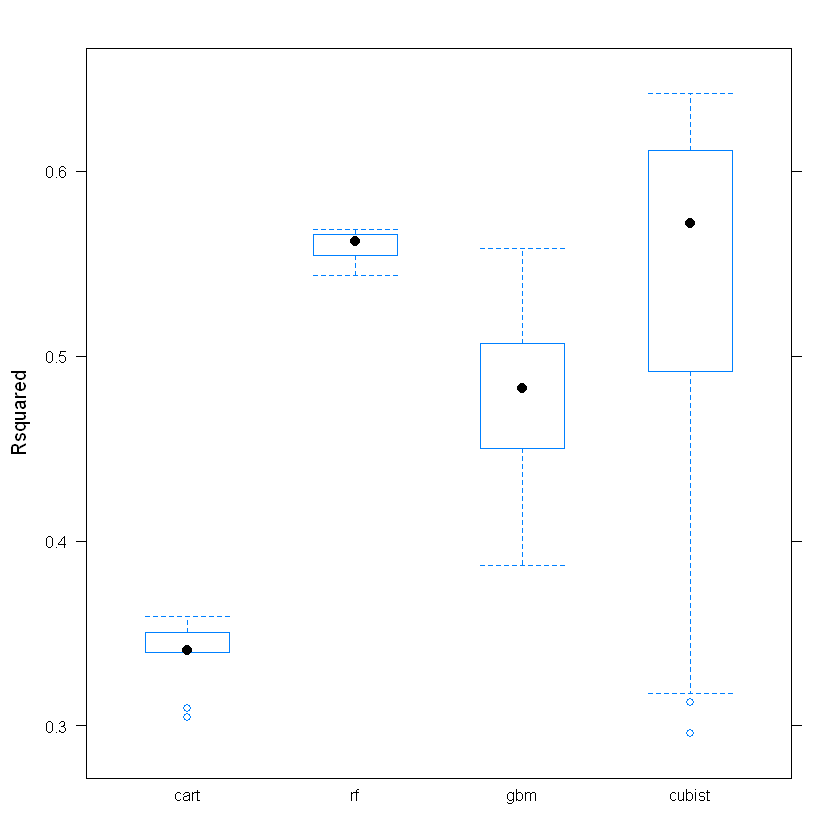

In [40]:
library(lattice)
bwplot(Rsquared~method,data=mdl_r2)

In [43]:
library(plyr)
ddply(mdl_r2, .(method), summarize, Rsquared = max(Rsquared))

method,Rsquared
cart,0.3589469
rf,0.5688488
gbm,0.5584050
cubist,0.6420798


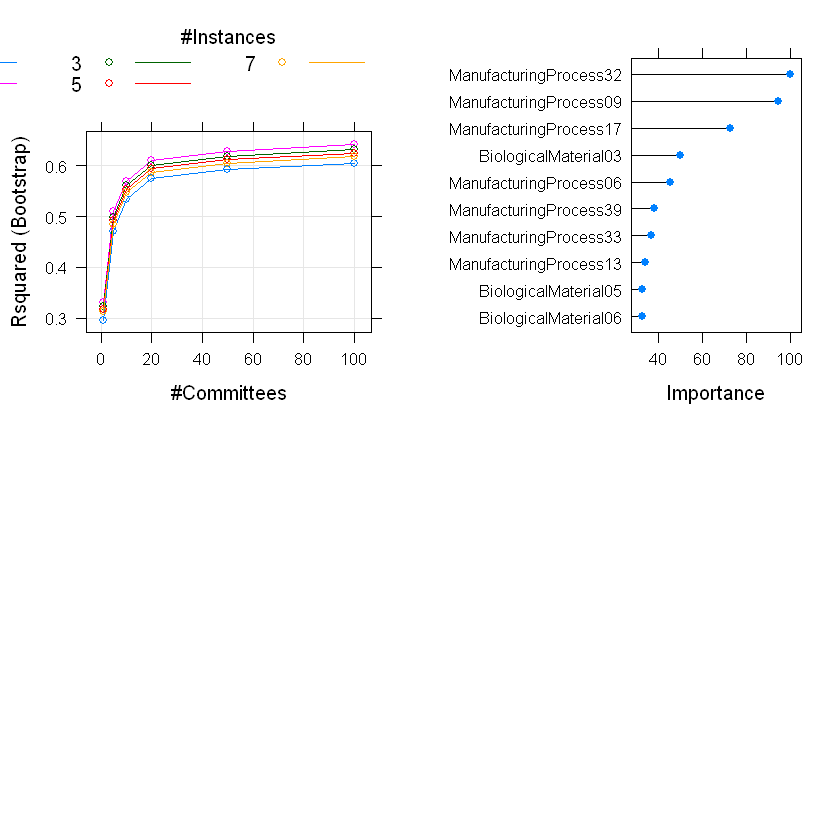

In [46]:
p1 <- plot(fit_cubist)
p2 <- plot(varImp(fit_cubist),top=10)
library(gridExtra)
grid.arrange(p1,p2,ncol=2,nrow=2)

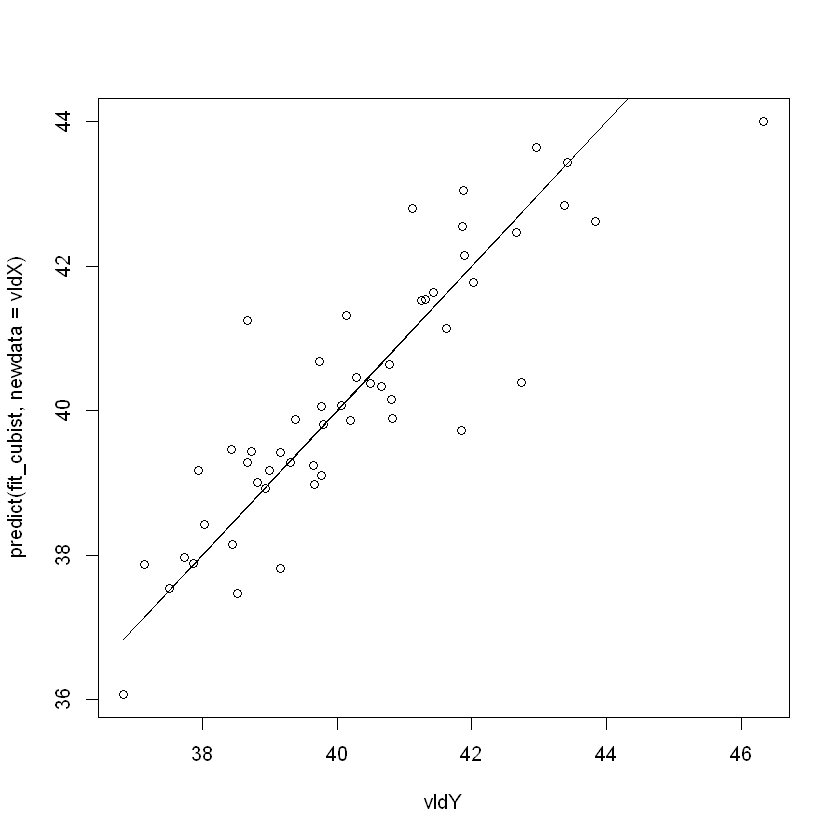

In [91]:
plot(vldY,predict(fit_cubist,newdata=vldX))
lines(vldY, vldY)

In [93]:
fit_cubist$bestTune

,committees,neighbors
27,100,1
